In [12]:
import json
import geopandas as gpd
import glob

# Calculate Canopy Cover by Community

## Download Data

Get data from City of Calgary Open Data (https://data.calgary.ca/)

In [3]:
# Tree Canopy

# https://data.calgary.ca/Environment/Tree-Canopy-2020/eymx-4za9/about_data
# https://data.calgary.ca/Environment/Tree-Canopy-2022/mn2n-4z98/about_data
# https://data.calgary.ca/Environment/Tree-Canopy-2012/8efa-as6u/about_data
# https://data.calgary.ca/Environment/Tree-Canopy-2017/immi-c5nn/about_data
# https://data.calgary.ca/Environment/Tree-Canopy-2015/ainq-wn9v/about_data
# https://data.calgary.ca/Environment/Tree-Canopy-2013/g868-hqkz/about_data

# Community Boundary

# https://data.calgary.ca/Base-Maps/Community-Boundaries/ab7m-fwn6

# City Boundary

# https://data.calgary.ca/Base-Maps/City-Boundary/7t9h-2z9s

In [4]:
# Reprojection

# NAD83 / UTM zone 11N
area_proj = "EPSG:26911"

## City Boundary

In [5]:
boundary_data = gpd.read_file(
    "../../data/CityBoundary/geo_export_c4efc033-5793-473f-808e-fa4d31b7e12f.shp"
)
boundary_data.geometry[0]
boundary_bbox = boundary_data.bounds.values.tolist()[0]
boundary_data = boundary_data.to_crs("EPSG:4326")

## Community Boundaries

In [6]:
df = gpd.read_file(
    "../../data/Community/geo_export_ce5f3ae5-ca36-4bb9-8c7a-62c336ddb2be.shp"
)
df["geom_reproj"] = df.to_crs(area_proj).geometry

<Axes: >

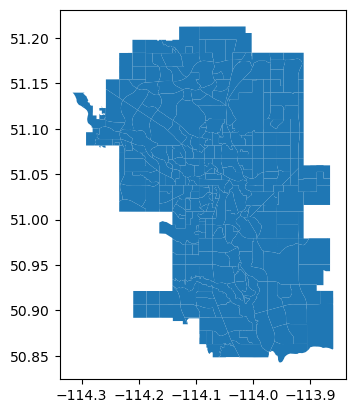

In [8]:
df.plot()

## Canopy Data


In [9]:
# Calculate canopy covery for each community boundary


def calc_canopy(x, file):
    # "../../Trees_2022/geo_export_dc81e6e2-f4a7-4c85-8a9c-deabecc1015d.shp",
    df1 = gpd.read_file(file, mask=x.geometry).clip(x.geometry)

    df1 = df1.to_crs(area_proj)
    tree_area = df1.area.sum()
    return tree_area / x.geom_reproj.area

In [11]:
shape_files = glob.glob("../../data/shapefile/*/*.shp")

for file in shape_files:
    print(f"Processing {file}")

    year = file.split("/")[-2]
    df["frac"] = df.apply(lambda x: calc_canopy(x, file), axis=1)

    df[["frac", "geometry", "name"]].to_file(f"canopy_{year}.json", driver="GeoJSON")

    print(f"Saved canopy_{year}.json")